# Normal Distribution

This is the probability density function in latex.

$ \frac{1} {\sigma \sqrt { 2 \pi }} e -\frac{1}{2}  (\frac{ x - \mu } {\sigma})^2 \\[1ex] $ 

In [6]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

from scipy.stats import binom

from scipy import stats

import seaborn as sb

import scipy.stats as st

from scipy.stats import multivariate_normal

from mpl_toolkits.mplot3d import Axes3D

import pandas as pd

A Normal Distribution is also known as a Gaussian distribution or famously Bell Curve. People use both words interchangeably, but it means the same thing. It is a continuous probability distribution.[1]

I firstly used numpy random to draw random samples from a normal (Gaussian) distribution. The probability density function of the normal distribution, first derived by De Moivre and 200 years later by both Gauss and Laplace independently, is often called the bell curve because of its characteristic shape (see the example below).The normal distributions occurs often in nature. For example, it describes the commonly occurring distribution of samples influenced by a large number of tiny, random disturbances, each with its own unique distribution [2].

A key principle that I'm going to give examples of in the notebook is the central limit theorm(CLT). In probability theory, the central limit theorem (CLT) states that the distribution of a sample variable approximates a normal distribution  as the sample size becomes larger, assuming that all samples are identical in size, and regardless of the population's actual distribution shape. [3] 

Probability Density Function for Gaussian distribution in Latex:

$ p(x) = \frac{1} {\sqrt { 2 \pi \sigma^2 }} e - (\frac{ (x - \mu) ^2 } {2\sigma^2}) \\[1ex] $ 

In [11]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
## generates a hundred numbers based on sigma

print (s)

[-5.72491126e-02 -4.08048716e-02  6.26461483e-02 -1.67179429e-01
  5.66310444e-02  1.36068921e-02  9.96917975e-02 -3.53372859e-02
 -7.17544691e-02  3.45388386e-02 -1.43403621e-01  1.05727427e-01
  3.78052872e-02  8.78765079e-03  1.11747658e-01 -3.77508603e-02
  6.74064387e-02 -4.13510093e-02  4.30687390e-02 -6.53710906e-02
 -1.12613283e-03 -1.04008980e-01  4.68519177e-02 -1.17923454e-02
  1.36707256e-01  1.78398297e-01 -4.00827652e-02  2.20823713e-02
  1.20661757e-01 -2.96376097e-02 -6.43366773e-02 -2.82714466e-01
 -2.68384972e-02  5.12850051e-02 -8.39838336e-02  7.35495824e-02
  2.43601616e-01  1.64556643e-01 -9.16176332e-02 -5.20009148e-02
  2.31677527e-01 -1.67665848e-01  7.81149864e-02  8.64955920e-02
 -1.98974358e-01  1.03588155e-01 -7.77799401e-02  5.31921827e-02
 -4.96860482e-02  2.05254243e-01  1.99950032e-01  2.00528690e-02
  3.78242225e-02 -5.38279759e-02  1.77762864e-02 -4.19716921e-02
  2.76179720e-02 -2.30539216e-03  5.63651521e-02 -5.18375237e-02
  8.91402456e-02 -2.55677

In [12]:
abs(mu - np.mean(s))

## abs returns the absolute value of the specified number

## verifies the mean and the variance of the numbers above

0.0036791226065646053

In [13]:
abs(sigma - np.std(s, ddof=1))

## ddof=1 provides an unbiased estimator of the variance of the infinite population.

## generates the sigma - standard deviation 

0.0004326913127604276

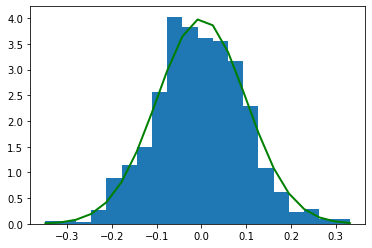

In [17]:
## code adapted from https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

count, bins, ignored = plt.hist(s, 20, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         ## standard deviation formula based on the latex formula from above
         linewidth=2, color='g')
plt.show()

This will display a histogram of the samples in the probability density function.

It looks like a bell curve based on the formula which we used above based on the derivation by De Moivre.

## Scipy stats and comparing a Normal and Frozen CDF 

There is also a built in scipy variable that I will also investigate further. Scipy allows you to shift and/or scale the distribution use the loc and scale parameters and then test whether the values will result in a normal distribution. 

The below example uses Percent-Point Function (PPF) and allows us to compare it to the Cumulative Distribution Function (CDF).

Cumulative Distribution Function (CDF) is used to describe the probability distribution of random variables. It can be used to describe the probability for a discrete, continuous or mixed variable. It is obtained by summing up the probability density function and getting the cumulative probability for a random variable. [4]

Probability Point Function or PPF is the inverse of the CDF which is why it is being used in the example below but I will quickly explain what it is used for.The probability density function is a derivative of the distribution function, which characterizes the density with which the values of the random variable are distributed at a given point. [5]

The example below shows us how valuable scipy is for developing graphs and how built in functions allow us to test whether the graph has a normal CDF.

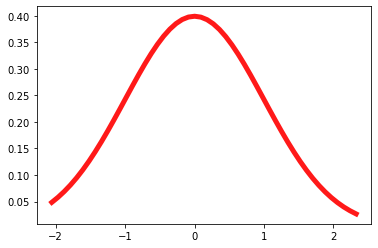

In [55]:
## code adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

fig, ax = plt.subplots(1, 1)

## creates a plot

mean, var, skew, kurt = norm.stats(moments='mvsk')

## Takes the first 4 moments

x = np.linspace(norm.ppf(0.02),
                norm.ppf(0.99), 50)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.9, label='norm pdf')

## Displays the PDF

## alpha changes the thickness and colour of line, 0.9 makes line thicker

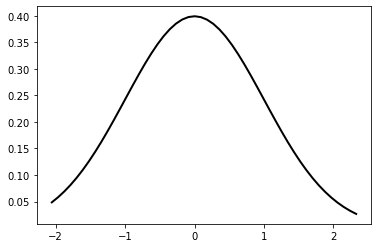

In [35]:
## code adapted from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.linspace(norm.ppf(0.02),
                norm.ppf(0.99), 50)

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [24]:

## This will check the accuracy
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

## np.allcose returnst rue if two arrays are element-wise equal within a tolerance.

True

In [50]:
## This will check the accuracy
vals = norm.ppf([0.12, 0.8, 0.991])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

False

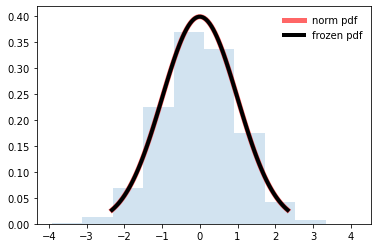

In [16]:
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=4, label='frozen pdf')

r = norm.rvs(scale = 1, size=10000)
## norm.rvs generates random normal distribution numbers according to the scale which is the standard deviation

ax.hist(r, density=True, alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()


## Normal distribution PDF with multiple standard deviations

I then decided I wanted to graph multiple different standard deviations on a graph as I wanted to see if we would see a similar bell chart given multiple different means and standard deviations.

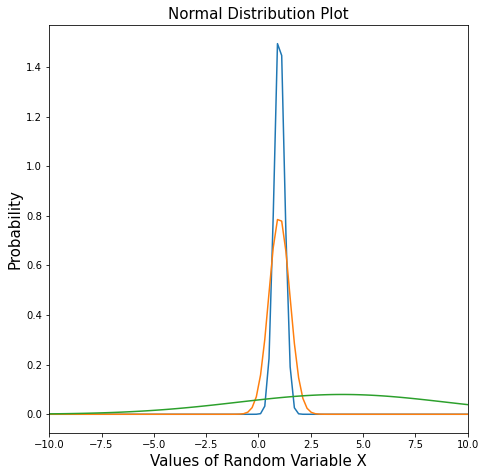

In [13]:
## I adapted code from https://vitalflux.com/normal-distribution-explained-python-examples/

# Values of random variable
#
x = np.linspace(-10, 10, 100)
#
plt.figure(figsize=(7.5,7.5))
#
# Normal distribution with mean 1 and std as 0.25
#
plt.plot(x, stats.norm(1, 0.25).pdf(x))
#
# Normal distribution with mean 1 and std as 0.5
#
plt.plot(x, stats.norm(1, 0.5).pdf(x))
#
# Normal distribution with mean 4 and std as 5
#
plt.plot(x, stats.norm(4, 5).pdf(x))

plt.xlim(-10, 10)
# sets x bar limit
plt.title('Normal Distribution Plot', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
## probability estimates of different values of random variable given the standard normal distribution
plt.show()
## plots graph

I think the key thing that I have spotted in doing this graph, is even with multiple standard deviations and means, we still see the bell curve graph. This graph is useful for displaying a lot of information that shows the standard deviation.

## Probabilities of a standard normal distribution.

To find the probability of a value occurring within a range in a normal distribution, we just need to find the area under the curve in that range. i.e. we need to integrate the density function. We can us scipy.norm class function to calculate probabilities from the normal distribution. This is easier to explain, given a scenario. [6] We have data of the heights of adults in a town and the data follows a normal distribution, we have a sufficient sample size with mean equals 5.6 and the standard deviation is 2.

C:\Users\Kenne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.21185539858339675

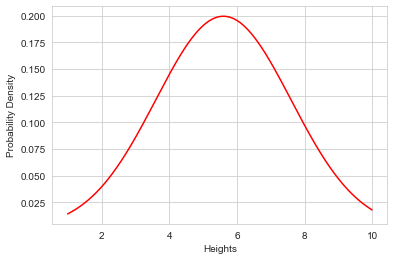

In [10]:
## Probabilities for Normally Distributed Data

# Creating distribution
data1 = np.arange(1,10,0.01)
pdf = norm.pdf(data , loc = 5.6 , scale = 2)
 
## loc documents the height and scale documents the standard deviation   
#Visualizing the distribution
 
sb.set_style('whitegrid')
sb.lineplot(data1, pdf , color = 'red')
plt.xlabel('Heights')
plt.ylabel('Probability Density')



In [14]:
LowProb = norm(loc = 5.6 , scale = 2).cdf(4.5)

print (LowProb)
## The area under the curve as shown in the figure above will be the probability that the height of the person will be smaller than 4.5 ft 

0.2911596867883464


This shows us that there is a 29.11% chance if a person is chosen randomly from the normal distribution with a mean of 5.6 and a standard deviation of 2, then the height of the person will be below 4.5 ft.

In [61]:
cdf_upper_limit = norm(loc = 5.6 , scale = 2).cdf(6.5)
cdf_lower_limit = norm(loc = 5.6 , scale = 2).cdf(4.5)
    
prob = cdf_upper_limit - cdf_lower_limit
print(prob)

0.3824850929237336


In [49]:
cdf_value = norm(loc = 5.6 , scale = 2).cdf(6.5)
HighProb = 1- cdf_value
print(HighProb)

0.32635522028791997


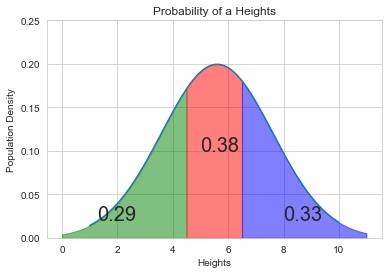

In [92]:
## adapted code idea from https://towardsdatascience.com/exploring-normal-distribution-with-jupyter-notebook-3645ec2d83f8#053b

fig, ax = plt.subplots()
# for distribution curve
x= np.arange(1,10,0.01)
## arranges x axis between 1 and 1-0
ax.plot(x, norm.pdf(x,loc=5.6,scale=2))
## Sets 5.6 as mean and 2 as standard deviation
ax.set_title("Probability of a Heights")
## Sets Title
ax.set_xlabel('Heights')
## Sets X label
ax.set_ylabel('Population Density')
## Sets Y Label
ax.grid(True)
# for fill_between
px=np.arange(0,4.5,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=5.6,scale=2),alpha=0.5, color='g')
# for text
# for fill_between
px=np.arange(4.5,6.5,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=5.6,scale=2),alpha=0.5, color='r')

px=np.arange(6.5,11,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=5.6,scale=2),alpha=0.5, color='b')

ax.text(1.25,0.02,round(LowProb,2), fontsize=20)
ax.text(5,0.1,round(prob,2), fontsize=20)
ax.text(8,0.02,round(HighProb,2), fontsize=20)
plt.show()

This to me is a very valuable implementation of normal distribution and more specifically CDF. I think it shows a real life implementation of normal distribution and how someone may use this in a survey project for a city. The inbuilt functions into scipy gave me the tools to develop the calculations and the idea and matplotlib gave me the tools to develop the graph.

If we were to take someone random on the street between 30-40 and ask their height, assuming that gender doesn't effect height. Normal distribution allows us to make a fairly educated guess as to what their actual age would be and using CDF allows us to know the probability of all outcomes and a figure on it.

## Confidence Intervals in Normal Distribution

A confidence interval for a mean is a range of values that is likely to contain a population mean with a certain level of confidence. With a small sample (number under 30), we can use the t.interval() function from the scipy.stats library to calculate a confidence interval for a population mean. [7] An example may be that there are 20 people working in an office and we may want to get their mean height in feet, we can use scipy stats to do this.

In [17]:
#define sample data
data = [5.5, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.8, 5.9, 6.0, 6.0, 6.1, 6.2, 6.2, 6.3]

#create 95% confidence interval for population mean weight
interval1, interval2 = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

print (interval)

(5.707015987779206, 5.999650678887461)


In [5]:
#define sample data
data2 = [5.5, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.8, 5.9, 6.0, 6.0, 6.1, 6.2, 6.2, 6.3]

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.99, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

(5.650253125198283, 6.056413541468384)

I firstly generated the data to 95% interval as it gives us a closer range of 5.707015987779206 to 5.999650678887461. The 99% gives us a further away interval of 5.650253125198283 to 6.056413541468384 due to the wider confidence interval.

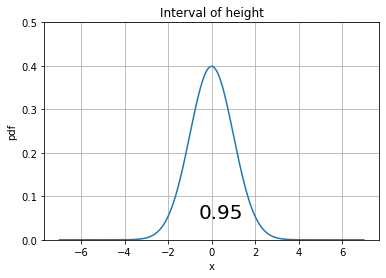

In [40]:
fig, ax = plt.subplots()
x= np.arange(-7,7,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Interval of height")
ax.set_xlabel('x')
ax.set_ylabel('pdf')
ax.grid(True)
px=np.arange(interval1, interval2 ,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5)
ax.text(-0.6,0.05,"0.95", fontsize=20)
plt.show()

If weâ€™re working with larger samples over 30 numbers, we can assume that the sampling distribution of the sample mean is normally distributed and can instead use the norm.interval() function from the scipy.stats library. [8]

I will use an example of a height in inches of 560. The example may be rainfall over a two month interval and a measurement of an estimated rainfall.

In [44]:
#define sample data
np.random.seed(0)
data = np.random.randint(5, 30, 60)

#create 95% confidence interval for population mean weight
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

(14.984670710137127, 19.048662623196204)

In [46]:
#define sample data
np.random.seed(0)
data = np.random.randint(5, 30, 60)

#create 99% confidence interval for population mean weight
st.norm.interval(alpha=0.99, loc=np.mean(data), scale=st.sem(data))

(14.346171305115446, 19.687162028217884)

This would mean that there is between a 95% chance, between 14.984670710137127 to 19.048662623196204 interval of rainfall over a 60 day period. This would mean that there is between a 99% chance, between 14.346171305115446, 19.687162028217884 interval of rainfall over a 60 day period.

I could see this being a very valuable resource, assuming that normal distribution applies and the data was structured quite closely, you would have an idea of an expected result.

I think this could be useful for esepcially financial forecasting, assuming you had a set income daily/monthly income, you could use intervals to account for a chance of a certain income vs spending and then give a confidence level based on the historic data, it would give an idea of future forecasting.

## Multivariate Normal Distribution

The multivariate normal distribution is a multidimensional generalisation of the one-dimensional normal distribution. It represents the distribution of a multivariate random variable that is made up of multiple random variables that can be correlated with each other. Like the normal distribution, the multivariate normal is defined by sets of parameters: the mean vector , which is the expected value of the distribution; and the covariance matrix , which measures how dependent two random variables are and how they change together. It can also be described as a generalization of the one-dimensional normal distribution to higher dimensions.[9] This is also an example of central limit theorm.

There is an inbuilt function from scipy.stats for multivariate which I will use for the next part. [10]

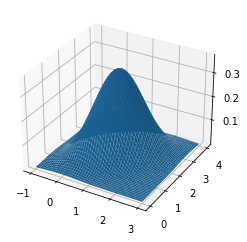

In [56]:
## code adapted from https://stackoverflow.com/questions/48465683/visualizing-a-multivariate-normal-distribution-with-numpy-and-matplotlib-in-3-di

x = np.linspace(-1, 3, 100)
y = np.linspace(0, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
mu = np.array([1, 2])
cov = np.array([[.5, .25],[.25, .5]])
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

## Standardized Normal Distribution

The standard normal distribution, also called the z-distribution, is a special normal distribution where the mean is 0 and the standard deviation is 1. Any normal distribution can be standardized by changing the values into z scores. Z scores show how many standard deviations from the mean each value lies. [11]  The z-score allows us to determine how usual or unusual a data point is in a distribution and to compare data points. The z-score is calculated by dividing the difference between the value and the mean by the standard deviation of the distribution.[12]

In [4]:
## code adapted from https://datagy.io/python-z-score/

values = [3,3,3,6,6,7,8,14,14,15,15,18]

zscores = stats.zscore(values)

## stats.zscore is an inbuilt function that allows 
print(zscores)
## prints results
## formula is subbtracting the mean from the value and dividing this by the standard deviation, all results are positive or negative and between -3 and 3 which proves standard deviation.

[-1.20286898 -1.20286898 -1.20286898 -0.63308894 -0.63308894 -0.44316226
 -0.25323558  0.88632451  0.88632451  1.07625119  1.07625119  1.64603124]


In [9]:
## code adapted from https://datagy.io/python-z-score/

df = pd.DataFrame.from_dict({
    'Name': ['Steve', 'Rick', 'Tom', 'Mitch', 'Mary'],
    'Age': [23, 31, 67, 32, 10],
    'Income': [65000, 91000, 47000, 26000, 15000],
    'Education' : [5, 7, 3, 4, 4]
})

In [10]:
df['Income zscore'] = stats.zscore(df['Income'])
print(df.head())

    Name  Age  Income  Education  Income zscore
0  Steve   23   65000          5       0.594817
1   Rick   31   91000          7       1.549461
2    Tom   67   47000          3      -0.066091
3  Mitch   32   26000          4      -0.837150
4   Mary   10   15000          4      -1.241038


References Used in Notebook

[1] https://www.askpython.com/python/normal-distribution

[2] https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

[3] https://www.investopedia.com/terms/c/central_limit_theorem.asp

[4] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

[5] https://www.simplilearn.com/tutorials/statistics-tutorial/cumulative-distribution-function

[6] https://radzion.com/blog/probability/density

[7] https://www.askpython.com/python/normal-distribution#:~:text=68%25%20of%20the%20data%20falls,standard%20deviations%20of%20the%20mean.

[8] https://www.statology.org/confidence-intervals-python/

[9] https://peterroelants.github.io/posts/multivariate-normal-primer/

[10] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

[11] https://www.scribbr.com/statistics/standard-normal-distribution/

[12] https://datagy.io/python-z-score/